In [28]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import pickle

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from gensim.models import Word2Vec

import matplotlib.pyplot as plt

from utils import init_random_seed, document_vectorizer, tokenize_corpus

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [29]:
SEED = 1
TRAIN_MODEL = False # if True, then train model and save it. if False, just load it
PATH_MODEL = "./Pre-trained Models/word2vec_kmeans.pkl"
PATH_DATASET = './Data/Dataset_cleaned.csv'

In [30]:
init_random_seed(SEED)

In [31]:
dataset = pd.read_csv(PATH_DATASET)['Application description']
dataset.head()

0    На трассе Нижнекамск-Чистополь в лесополосе у ...
1    Во дворе дома Ленинградская 29 отсутствуют пар...
2    Добрый день! Не осуществляется уборка снега в ...
3    Добрый день! Не осуществляется вывоз мусора с ...
4    на данном участке проезжей части от ул.Халитов...
Name: Application description, dtype: object

In [32]:
dataset = tokenize_corpus(dataset, min_token_size=4)

In [33]:
word2vec = Word2Vec(
    sentences=dataset,
    vector_size=50,
    window=5,
    min_count=5,
    sg=1,
    epochs=10,
    seed=SEED
)

In [34]:
data = np.array([document_vectorizer(doc, word2vec) for doc in dataset])

In [35]:
max_cluster = 50
inertia = []

if TRAIN_MODEL:
    for cluster_num in range(1, max_cluster):
        k_means = KMeans(
            init='k-means++',
            n_clusters=cluster_num,
            n_init='auto',
            max_iter=300,
            verbose=0,
            random_state=SEED
        )
    
        k_means.fit(data)
        inertia.append(k_means.inertia_)

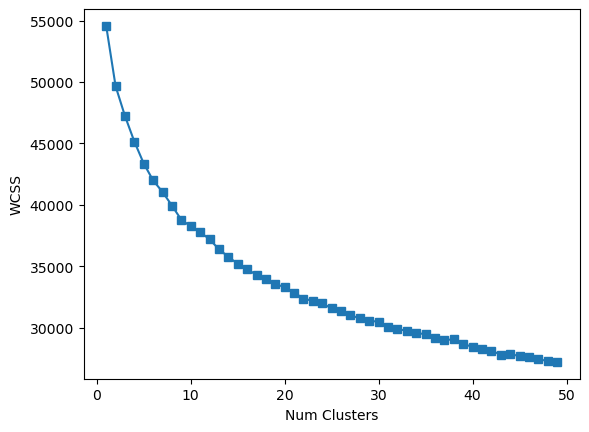

In [36]:
if TRAIN_MODEL:
    plt.plot(range(1, max_cluster), inertia, marker='s')
    plt.xlabel('Num Clusters')
    plt.ylabel('WCSS')

In [37]:
if TRAIN_MODEL:
    cluster_num = 25

    k_means = KMeans(
        init='k-means++',
        n_clusters=cluster_num,
        n_init='auto',
        max_iter=300,
        verbose=0,
        random_state=SEED
    )
    
    k_means.fit(data)
    
    pickle.dump(k_means, open(PATH_MODEL, "wb"))

In [38]:
if not TRAIN_MODEL:
    k_means = pickle.load(open(PATH_MODEL, 'rb'))

In [39]:
pred = k_means.labels_
print(f"Silhouette Coefficient: {silhouette_score(data, pred):.4f}")

Silhouette Coefficient: 0.0700
